In [41]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy import symbols, Matrix, Poly

# Question 6

Consider the two univariate polynomials

p(x) = x^3 − 3x^2 + x − 3

q(x) = x^2 + x − 12

a) Using the method of resultants, decide whether p(x) and q(x) share a common root.

b) If the two polynomials share a common root, use the ratio method discussed in class to find that root.

In [42]:
A = np.array(
    [
        [1, -3, 1, -3, 0],
        [0, 1, -3, 1, -3],
        [1, 1, -12, 0, 0],
        [0, 1, 1, -12, 0],
        [0, 0, 1, 1, -12],
    ]
)

In [43]:
np.linalg.det(A)

np.float64(0.0)

In [44]:
A_partial = np.delete(A, -1, axis=0)
print(A_partial)

[[  1  -3   1  -3   0]
 [  0   1  -3   1  -3]
 [  1   1 -12   0   0]
 [  0   1   1 -12   0]]


In [45]:
A1 = np.delete(A_partial, 0, axis=1)
A2 = np.delete(A_partial, 1, axis=1)

print(A1)
print(A2)

[[ -3   1  -3   0]
 [  1  -3   1  -3]
 [  1 -12   0   0]
 [  1   1 -12   0]]
[[  1   1  -3   0]
 [  0  -3   1  -3]
 [  1 -12   0   0]
 [  0   1 -12   0]]


In [46]:
x = (-1) ** (1 + 2) * np.linalg.det(A1) / np.linalg.det(A2)

print(x)

3.0000000000000013


In [47]:
x**3 - 3 * x**2 + x - 3

np.float64(1.554312234475219e-14)

In [48]:
x**2 + x - 12

np.float64(8.881784197001252e-15)

# Question 7

Consider the two bivariate polynomials

p(x, y) = 2x^2 + 2y^2 − 4x − 4y + 3

q(x, y) = x^2 + y^2 + 2xy − 5x − 3y + 4

a) Draw the zero contour p(x, y) = 0 and the zero contour q(x, y) = 0, with x and y real.

b) Using the method of resultants, solve for the intersection points of these contours, i.e., ﬁnd all (x, y) for which p(x, y) = 0 = q(x, y), with x and y real.
Do so by treating the polynomials p and q as functions of y, temporarily viewing x as a constant.
Obtain a 4 × 4 matrix whose determinant, now a function of x, is the desired resultant.
Find the x-roots of that determinant, thereby projecting the intersection points onto the x-axis.
Use those x-roots to ﬁnd the y-coordinates of the intersection points.
Verify your intersection points.

In [49]:
# Define the polynomials as functions
def p(x, y):
    return 2 * x**2 + 2 * y**2 - 4 * x - 4 * y + 3


def q(x, y):
    return x**2 + y**2 + 2 * x * y - 5 * x - 3 * y + 4

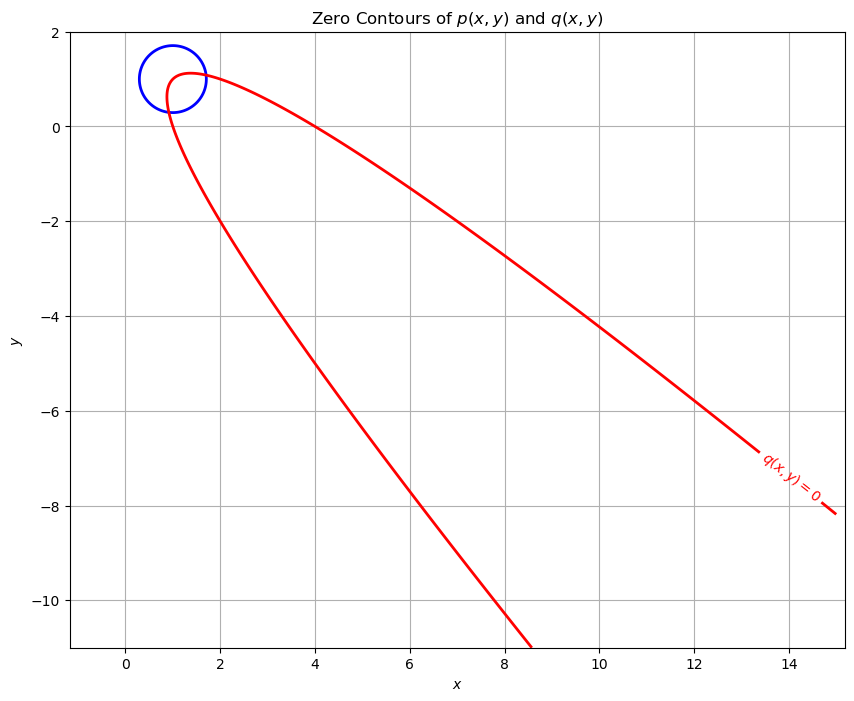

In [50]:
# Create a grid of x and y values
x = np.linspace(-1, 15, 400)  # Adjust the range as needed
y = np.linspace(-11, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute the polynomial values on the grid
P = p(X, Y)
Q = q(X, Y)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the zero contour of p(x, y)
contour_p = plt.contour(X, Y, P, levels=[0], colors="blue", linewidths=2)
plt.clabel(contour_p, inline=True, fontsize=10, fmt="$p(x, y) = 0$")

# Plot the zero contour of q(x, y)
contour_q = plt.contour(X, Y, Q, levels=[0], colors="red", linewidths=2)
plt.clabel(contour_q, inline=True, fontsize=10, fmt="$q(x, y) = 0$")

# Customize the plot
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Zero Contours of $p(x, y)$ and $q(x, y)$")
plt.grid(True)
plt.axis("equal")

plt.savefig("../figs/zero_contour_both.png", dpi=300)

# Display the plot
plt.show()

In [51]:
# Create a grid of x and y values
x = np.linspace(0, 2, 400)
y = np.linspace(0, 2, 400)
X, Y = np.meshgrid(x, y)

# Compute the polynomial values on the grid
P = p(X, Y)

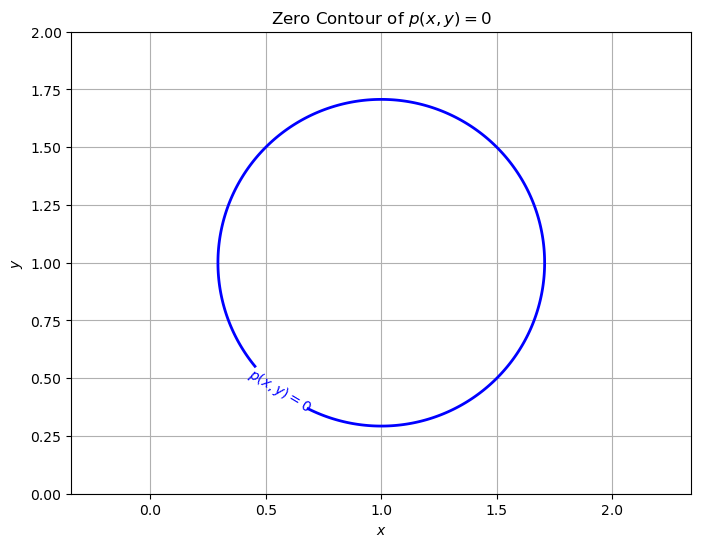

In [52]:
# Plot for p(x, y) = 0
plt.figure(figsize=(8, 6))
contour_p = plt.contour(X, Y, P, levels=[0], colors="blue", linewidths=2)
plt.clabel(contour_p, inline=True, fontsize=10, fmt="$p(x, y) = 0$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Zero Contour of $p(x, y) = 0$")
plt.grid(True)
plt.axis("equal")
plt.savefig("../figs/zero_contour_p.png", dpi=300)
plt.show()

In [53]:
# Create a grid of x and y values
x = np.linspace(0, 1200, 400)
y = np.linspace(-1000, 20, 400)
X, Y = np.meshgrid(x, y)

# Compute the polynomial values on the grid
Q = q(X, Y)

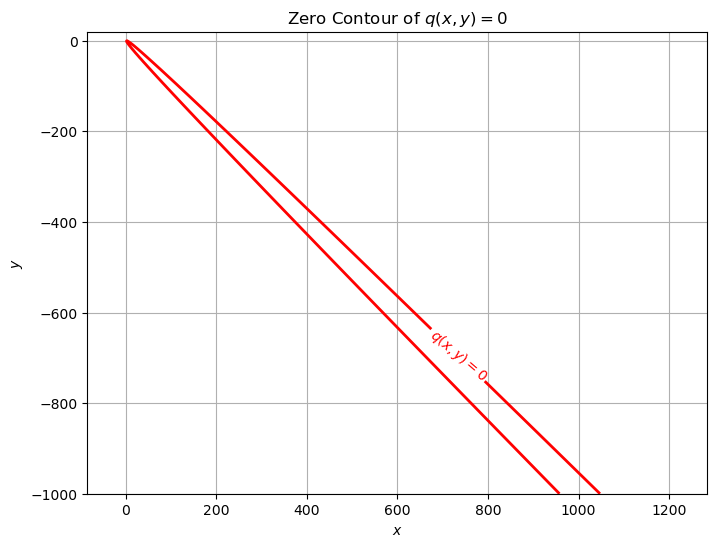

In [54]:
# Plot for q(x, y) = 0
plt.figure(figsize=(8, 6))
contour_q = plt.contour(X, Y, Q, levels=[0], colors="red", linewidths=2)
plt.clabel(contour_q, inline=True, fontsize=10, fmt="$q(x, y) = 0$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Zero Contour of $q(x, y) = 0$")
plt.grid(True)
plt.axis("equal")
plt.savefig("../figs/zero_contour_q.png", dpi=300)
plt.show()

In [55]:
x, y = symbols("x y")

In [56]:
p = 2 * x**2 + 2 * y**2 - 4 * x - 4 * y + 3
q = x**2 + y**2 + 2 * x * y - 5 * x - 3 * y + 4

In [57]:
A = Matrix(
    [
        [2, -4, 2 * x**2 - 4 * x + 3, 0],
        [0, 2, -4, 2 * x**2 - 4 * x + 3],
        [1, 2 * x - 3, x**2 - 5 * x + 4, 0],
        [0, 1, 2 * x - 3, x**2 - 5 * x + 4],
    ]
)

sp.pprint(A)

⎡               2                          ⎤
⎢2    -4     2⋅x  - 4⋅x + 3        0       ⎥
⎢                                          ⎥
⎢                               2          ⎥
⎢0     2           -4        2⋅x  - 4⋅x + 3⎥
⎢                                          ⎥
⎢              2                           ⎥
⎢1  2⋅x - 3   x  - 5⋅x + 4         0       ⎥
⎢                                          ⎥
⎢                              2           ⎥
⎣0     1        2⋅x - 3       x  - 5⋅x + 4 ⎦


In [58]:
determinant = sp.simplify(A.det())
sp.pprint(determinant)

    4       3       2            
16⋅x  - 48⋅x  + 48⋅x  - 28⋅x + 11


In [59]:
roots = sp.solve(determinant, x)
sp.pprint(roots)

⎡               __________                 __________        __________        ↪
⎢  √5   3      ╱   √5   1     √5   3      ╱   √5   1        ╱   1   √5    √5   ↪
⎢- ── + ─ -   ╱  - ── - ─ , - ── + ─ +   ╱  - ── - ─ , -   ╱  - ─ + ──  + ── + ↪
⎣  4    4   ╲╱     8    8     4    4   ╲╱     8    8     ╲╱     8   8     4    ↪

↪         __________         ⎤
↪  3     ╱   1   √5    √5   3⎥
↪  ─,   ╱  - ─ + ──  + ── + ─⎥
↪  4  ╲╱     8   8     4    4⎦


In [63]:
for root in roots:
    p_y = Poly(sp.simplify(p.subs(x, root)), y)
    q_y = Poly(sp.simplify(q.subs(x, root)), y)

    # print(f"Root: {root}")
    # print("p(y) = ")
    # sp.pprint(p_y)
    # print("q(y) = ")
    # sp.pprint(q_y)

    # Compute the GCD of the polynomials
    gcd = sp.gcd(p_y, q_y)
    # print("\nThe GCD of p_y and q_y is:")
    # sp.pprint(gcd)

    # Find the root(s) of the GCD
    common_root = sp.solve(gcd, y)

    print("\nSubstitute the common root(s) into p(x, y):")
    sp.pprint((p.subs({x: root, y: common_root[0]})).evalf())
    print("\nSubstitute the common root(s) into q(x, y):")
    sp.pprint((q.subs({x: root, y: common_root[0]})).evalf())

    print("x = ")
    sp.pprint(root)
    print("x approximation: ")
    sp.pprint(root.evalf())
    print("y = ")
    sp.pprint(common_root[0])
    print("y approximation: ")
    sp.pprint(common_root[0].evalf())


Substitute the common root(s) into p(x, y):
-0.e-126 + 0.e-126⋅ⅈ

Substitute the common root(s) into q(x, y):
-0.e-128 + 0.e-128⋅ⅈ
x = 
               __________
  √5   3      ╱   √5   1 
- ── + ─ -   ╱  - ── - ─ 
  4    4   ╲╱     8    8 
x approximation: 
0.190983005625053 - 0.636009824757034⋅ⅈ
y = 
    __________             
3⋅╲╱ 2 + 2⋅√5    3⋅√5⋅ⅈ   ⅈ
────────────── - ────── - ─
      2            2      2
───────────────────────────
      ________             
 √2⋅╲╱ 1 + √5  - √5⋅ⅈ + ⅈ  
y approximation: 
1.80901699437495 - 0.636009824757034⋅ⅈ

Substitute the common root(s) into p(x, y):
-0.e-126 - 0.e-126⋅ⅈ

Substitute the common root(s) into q(x, y):
-0.e-128 - 0.e-128⋅ⅈ
x = 
               __________
  √5   3      ╱   √5   1 
- ── + ─ +   ╱  - ── - ─ 
  4    4   ╲╱     8    8 
x approximation: 
0.190983005625053 + 0.636009824757034⋅ⅈ
y = 
    __________             
3⋅╲╱ 2 + 2⋅√5    ⅈ   3⋅√5⋅ⅈ
────────────── + ─ + ──────
      2          2     2   
───────────────────────────